# **Exploratory Data Analysis on student Academic Performance**

### **Import Libraries**

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

We begin by importing essential Python libraries.
NumPy for numerical operations
Pandas for data manipulation
Seaborn and Matplotlib for statistical and exploratory visualizations
Plotly for interactive charts

### **Load Dataset**

In [ ]:
#load dataset
df = pd.read_csv("/content/Final_Marks_Data.csv")
df.head(5)

,Student_ID,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100)
0,S1000,84,30,36,7,3,72
1,S1001,91,24,38,6,3,56
2,S1002,73,29,26,7,3,56
3,S1003,80,36,35,7,3,74
4,S1004,84,31,37,8,3,66


In [ ]:
#last 5 rows of the dataset
df.tail(5)

,Student_ID,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100)
1995,S2995,82,31,28,6,2,52
1996,S2996,78,38,27,7,2,57
1997,S2997,78,30,33,9,2,61
1998,S2998,82,29,40,8,3,59
1999,S2999,97,32,38,7,3,64


### **Summary Statics**

In [ ]:
df.shape

(2000, 7)

We load the student performance dataset, which contains 2000 rows and 7 columns.
This dataset includes attendance, internal assessments, study hours, and final exam scores.

In [ ]:
df.describe()

,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100)
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,84.891500,32.115500,32.464500,7.507000,2.823500,64.855000
std,7.758855,4.563504,4.522827,1.021015,0.608714,11.341265
min,52.000000,18.000000,16.000000,4.000000,1.000000,25.000000
25%,80.000000,29.000000,29.000000,7.000000,2.000000,58.000000
50%,85.000000,32.000000,33.000000,8.000000,3.000000,65.000000
75%,90.000000,35.000000,36.000000,8.000000,3.000000,73.000000
max,100.000000,40.000000,40.000000,10.000000,5.000000,100.000000


Key insights from the descriptive statistics:

In student performance dataset the attendance percentage range from 52 % to 100%  and the average is 84%. Internal tests avg ~32/40, showing strong mid-term understanding.
Final exam avg ~65/100, lower than internal tests  indicates final exam is more challenging.
Most students study 2–3 hours/day, which aligns with average performance.
High variation in final scores (25–100) shows differing study habits and skill levels.

In [ ]:
#info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Student_ID                     2000 non-null   object
 1   Attendance (%)                 2000 non-null   int64 
 2   Internal Test 1 (out of 40)    2000 non-null   int64 
 3   Internal Test 2 (out of 40)    2000 non-null   int64 
 4   Assignment Score (out of 10)   2000 non-null   int64 
 5   Daily Study Hours              2000 non-null   int64 
 6   Final Exam Marks (out of 100)  2000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 109.5+ KB


in student performance dataset there is no mssing value ,and only one column student Id is object and other are numerical.

### **Data Visualization**

<Axes: >

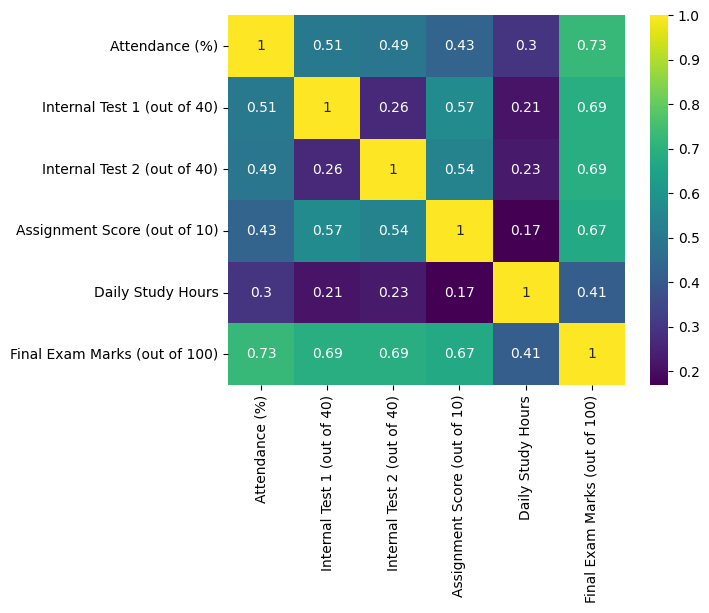

In [ ]:
sns.heatmap(df.drop("Student_ID", axis = 1).corr(), annot= True, yticklabels = True,  cbar = True, cmap = "viridis")

this heatmap shows the correlation between the columns.

/tmp/ipython-input-3365601206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Daily Study Hours" , y = "Final Exam Marks (out of 100)", data = df, palette = my_colors)
/tmp/ipython-input-3365601206.py:3: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x = "Daily Study Hours" , y = "Final Exam Marks (out of 100)", data = df, palette = my_colors)


<Axes: xlabel='Daily Study Hours', ylabel='Final Exam Marks (out of 100)'>

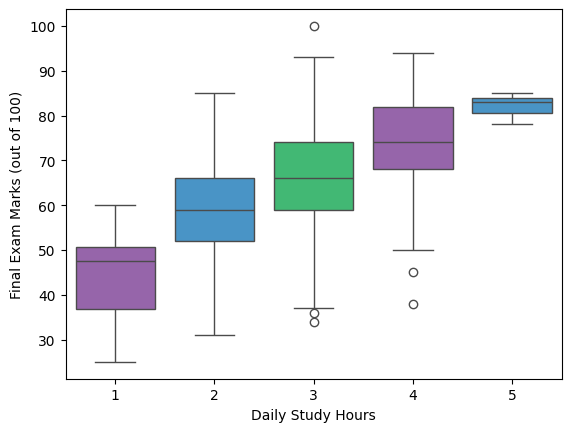

In [ ]:
# Custom list of colors
my_colors = ["#9b59b6", "#3498db", "#2ecc71"]
sns.boxplot(x = "Daily Study Hours" , y = "Final Exam Marks (out of 100)", data = df, palette = my_colors)


Students studying 3+ hours/day tend to score higher in final exams.

Clear upward trend as study hours increase.

In [ ]:
import plotly.express as px
fig = px.histogram(df , x = df['Final Exam Marks (out of 100)'], title = "histogram for marks distribution ")
fig.show()

In [21]:
fig = px.scatter(df, x='Attendance (%)', y='Final Exam Marks (out of 100)',
                 size='Assignment Score (out of 10)', color='Internal Test 1 (out of 40)',
                 hover_data=['Student_ID'],
                 title='Attendance vs Final Marks with Test & Assignment info')
fig.show()


Higher attendance generally leads to better exam performance.

Large bubbles (high assignment score) and darker colors (high Test 1 score) cluster at higher exam marks.

In [25]:
fig = px.scatter(df,
                 x= 'Internal Test 1 (out of 40)',
                 y = 'Final Exam Marks (out of 100)',
                 trendline = "ols",
                 title = "Internal Test 1 vs Final Exam Marks"
                 )
fig.show()

Strong positive relationship.

Students with higher internal test scores tend to score higher in the final exam.

In [26]:
fig = px.scatter(df,
                 x='Assignment Score (out of 10)',
                 y='Final Exam Marks (out of 100)',
                 trendline='ols',
                 title='Assignment Score vs Final Exam Marks')
fig.show()


Assignment performance also positively impacts final exam marks.

Students scoring 8–10 in assignments consistently achieve higher final scores.

In [27]:
fig = px.scatter(df,
                 x='Internal Test 1 (out of 40)',
                 y='Final Exam Marks (out of 100)',
                 size='Assignment Score (out of 10)',
                 color='Internal Test 2 (out of 40)',
                 hover_data=['Student_ID'],
                 title='Combined Impact of Tests & Assignment on Final Exam Marks')
fig.show()


Test 2 has slightly higher variability.

Assignment scores are more tightly clustered.

In [23]:
import plotly.express as px

score_df = df[['Internal Test 1 (out of 40)',
               'Internal Test 2 (out of 40)',
               'Assignment Score (out of 10)']]

fig = px.box(score_df,
             title='Distribution Comparison: Test 1, Test 2, Assignment')
fig.show()


tudents performed well overall in all three assessments, with medians in the high B to low A range.Test 2 has a slightly higher median compared to Test 1, indicating minor improvement or a slightly easier test.Assignment scores show the least variability, meaning students performed uniformly well.